<a href="https://colab.research.google.com/github/aleksaveger-bot/AlexaVegera/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B02%2BEDA_%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D1%83%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Задача**
По данным о пациенте из файла **heart_ssz.tsv** научиться предсказывать наличие у него сердечно-сосудистого заболевания



# ПРЕДОБРАБОТКА ДАННЫХ

## ИМПОРТ ДАННЫХ

* Загрузим необходимые библиотеки

In [ ]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных

In [ ]:
heart = pd.read_csv('.../heart_ssz.tsv', sep='\t')
heart.head().T # выведем первые 5 строк таблицы

,0,1,2,3,4
ID,0,1,2,3,4
Бронхиальная астма,0,0,0,0,0
ЛПНП,2.79,6.62,3.17,2.74,6.62
Возраст алког,18.0,NaN,17.0,13.0,16.0
Работа,1,0,0,1,0
ВИЧ/СПИД,0,0,0,0,0
Статус Курения,Курит,Никогда не курил(а),Никогда не курил(а),Бросил(а),Никогда не курил(а)
Пассивное курение,0,0,1,1,1
Переломы,0,1,0,0,1
Время пробуждения,06:00:00,04:00:00,07:00:00,07:00:00,06:00:00


In [ ]:
display(heart.tail())

## ПРОВЕРКА ДАННЫХ

* Узнаем количество строк и столбцов в датафрейме

In [ ]:
heart.shape

... строк и ... столбца

* Посмотрим информацию о признаках с помощью функции **.info()**

* Выведем названия всех признаков в наборе данных **heart**

In [ ]:
heart.columns

* Посмотрим описательную статистику числовых признаков с помощью метода  **.describe()**, округлив значения до 2-х знаков после запятой c помощью **round()**

* Для удобства изучения транспонируем таблицу с помощью **.T**

* Посмотрим описательные статистики категорийных признаков с помощью метода **.describe()**, используя параметр **include='object'**
* Транспонируем таблицу

* Можно посмотреть статистики всех переменных используя значение **'all'** для аргумента **include**

In [ ]:
heart.describe(include='all').round(2).T

* Узнаем количество уникальных значений в каждом столбце с помощью метода .**nunique()**

* Подсчитаем количество значений всех признаков датасета, включая пропущенные

In [ ]:
for col in heart.columns:
    print(f'Признак:  {heart[col].value_counts(dropna=False)}')

* Результаты слиплись между собой. Сделай так, чтобы между информацией о переменных была пустая строка

 #### Анализ целевой переменной

Целевая переменная - категориальная, бинарная. Имеет значения- 0 (нет ССЗ) и 1 (есть ССЗ). Необходимо посмотреть как она распределена. Для этого используйте визуализацию.

In [ ]:
# Процентное соотношение
print("Процентное соотношение классов:")
print(heart['ССЗ'].value_counts(normalize=True) * 100)

#### Распределение числовых признаков

In [ ]:
# Получение списка числовых признаков
numeric_columns = heart.select_dtypes(include=['number']).columns.tolist()

# Выводим результат
print(numeric_columns)

* Постройте графики распределений (не хватает одной строки кода, добавьте её по заданию из комментария в коде)

In [ ]:
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Перебираем все столбцы
for column in numeric_columns:
    unique_values = heart[column].nunique()  # Получаем количество уникальных значений

    plt.figure(figsize=(12, 6))

    if unique_values > 2:  # Если больше 2 уникальных значений, строим гистограмму и коробчатую диаграмму
        plt.subplot(1, 2, 1)
        sns.histplot(heart[column], bins=30, kde=True, color='blue')
        plt.title(f'Гистограмма и плотность для {column}')
        plt.xlabel(column)
        plt.ylabel('Плотность')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=heart[column], color='lightgray')
        plt.title(f'Коробчатая диаграмма для {column}')
        plt.xlabel(column)

    elif unique_values == 2:  # Если ровно 2 уникальных значения, строим столбиковую диаграмму
        plt.subplot(1, 1, 1)

      #!!! впишите код построения столбиковой диаграммы с помощью функции countplot из библиотеки Seaborn!!!


        plt.title(f'Столбиковая диаграмма для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество')

    plt.tight_layout() #функция, которая автоматически корректирует расстояние между элементами графика
    plt.show()

* Допиши код: укажи параметры гистограммы, чтобы получился результат как на выполненном коде

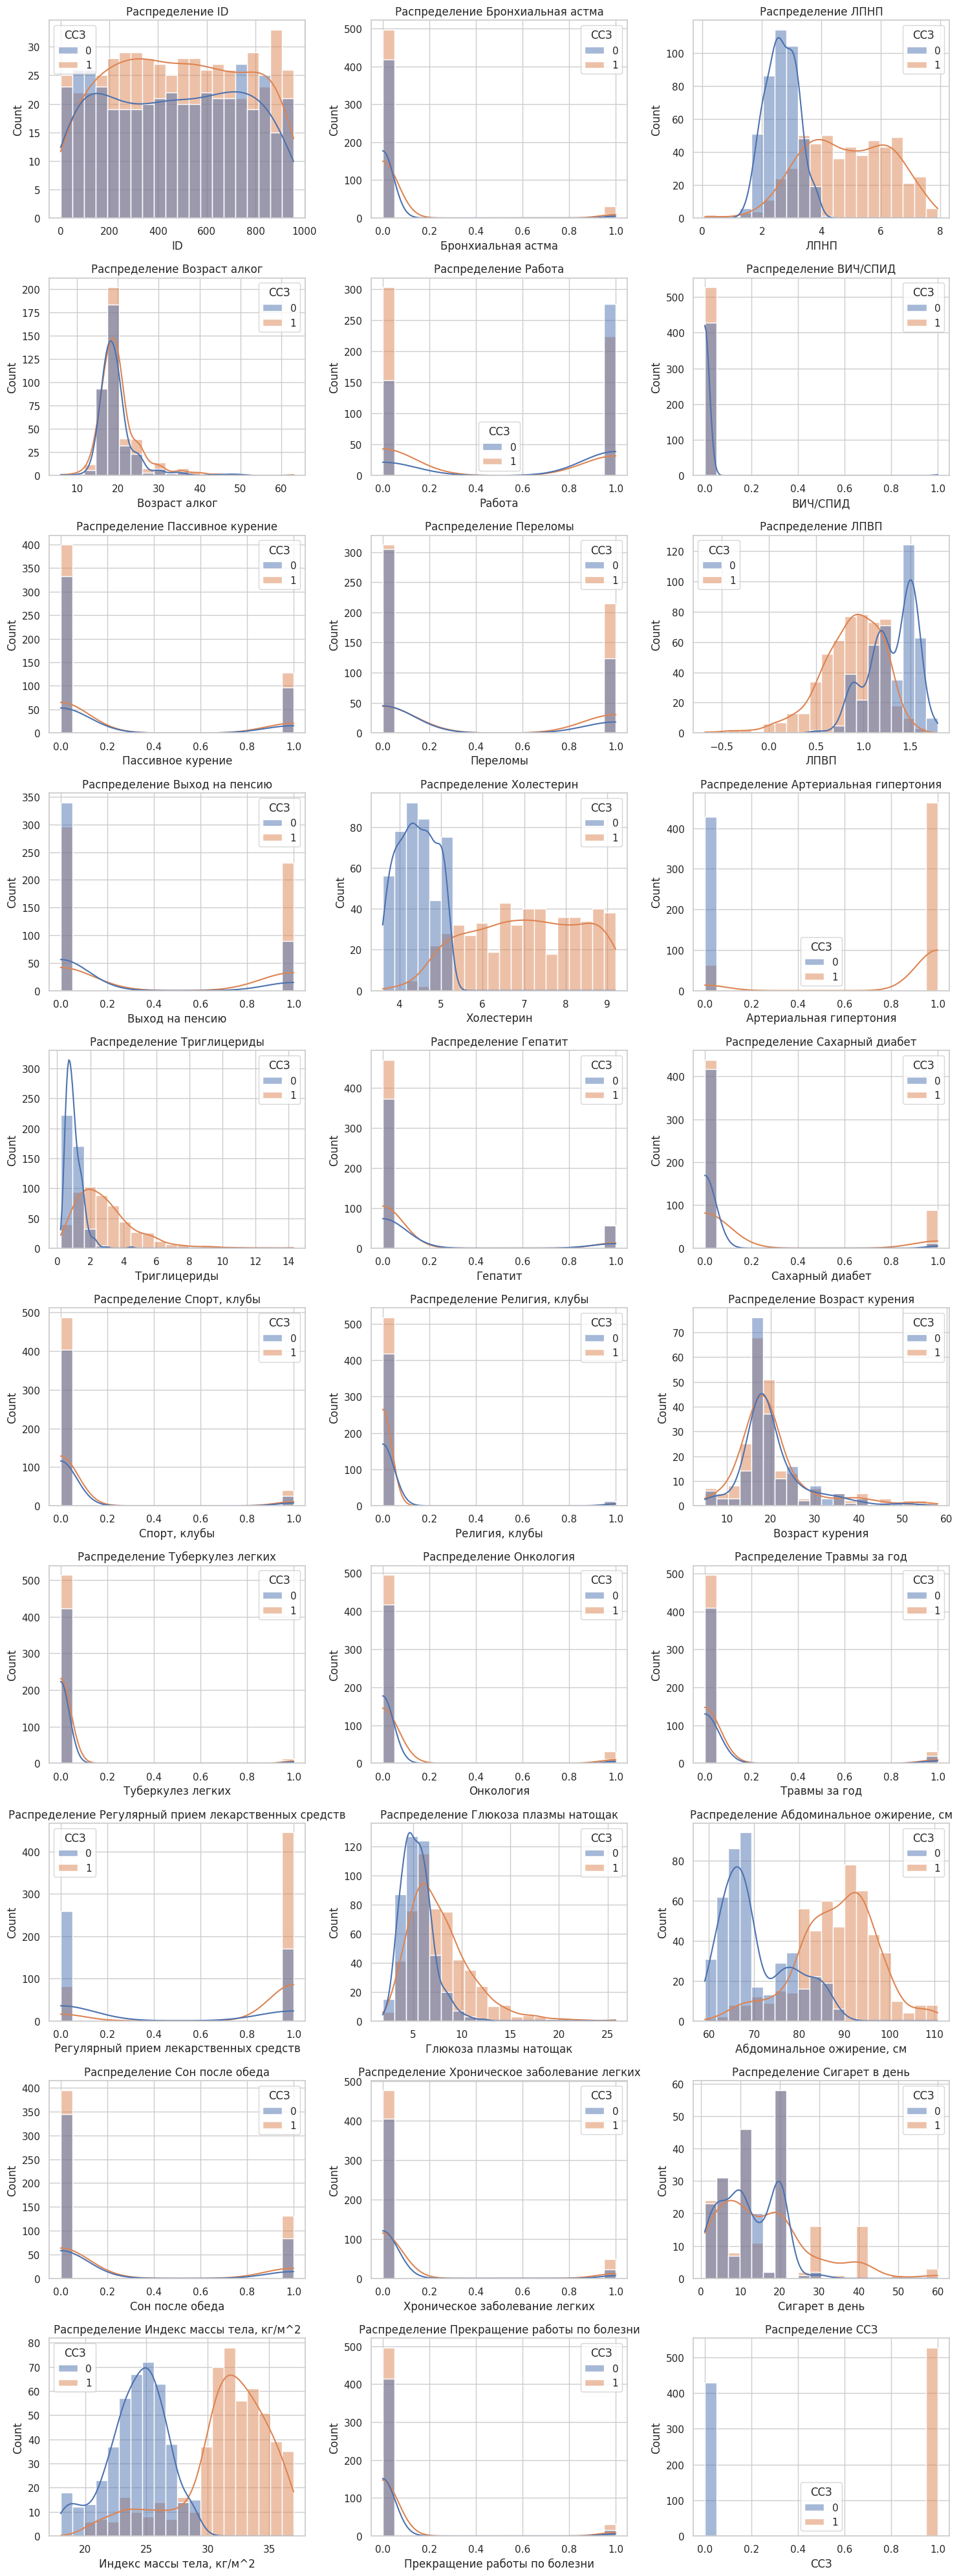

In [ ]:
# Гистограммы числовых признаков
heart[numeric_columns] = heart[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 40))
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 3, i+1)
    sns.histplot(data=, x=, hue='', kde=, bins=) # ДОПИШИ КОД
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

#### Парные диаграмы рассеяния

* Построим для начала в Matplotlib. Убедимся, что код сложный, большой.

In [ ]:
# Берём список числовых столбцов из DataFrame heart
numeric_columns = heart.select_dtypes(include=[np.number]).columns.tolist()

cols = numeric_columns  # список названий числовых столбцов
n = len(cols)  # число числовых признаков
if n == 0:
    # Если числовых столбцов нет — сообщаем об ошибке
    raise ValueError("Нет числовых столбцов для построения.")

# Размер фигуры — масштабируем в зависимости от числа признаков
figsize = (2.5 * n, 2.5 * n)
# Создаём матрицу осей n x n
fig, axes = plt.subplots(nrows=n, ncols=n, figsize=figsize, squeeze=False)
# Отступы между подграфиками
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Проходим по всем парам признаков (i, j)
for i, ci in enumerate(cols):
    for j, cj in enumerate(cols):
        ax = axes[i][j]  # текущая ось (subplot)
        if i == j:
            # Если это диагональный элемент — строим гистограмму данного признака
            data = heart[ci].dropna()  # убираем пропуски перед построением
            if data.shape[0] > 0:
                # Гистограмма с 30 бинами, светло-серым заливом и чёрной границей
                ax.hist(data, bins=30, color='lightgray', edgecolor='black')
            # Не показываем подписи осей для компактности (подпись — в заголовке)
            ax.set_xlabel('')
            ax.set_ylabel('')
            # Заголовок подграфика — имя признака
            ax.set_title(ci, fontsize=9)
        else:
            # Вне диагонали — scatter plot (cj по оси x, ci по оси y)
            x = heart[cj]
            y = heart[ci]
            # Маска для точек, где оба значения не пропущены
            mask = x.notna() & y.notna()
            # Рисуем точки с небольшим размером и прозрачностью для визуальной читабельности
            ax.scatter(x[mask], y[mask], s=8, alpha=0.6, color='tab:blue')
            # Для компактности убираем подписи внутренних осей, показываем только крайние
            ax.set_xlabel('')
            ax.set_ylabel('')
        # Настройка визуальной степени тиков: показываем небольшие шрифты
        ax.tick_params(axis='both', which='major', labelsize=7)

# Добавляем общий заголовок для всей фигуры
fig.suptitle('Парные диаграммы (Matplotlib)', fontsize=14)

plt.show() # Показываем итоговый рисунок

* Построим в Seaborn: проще и понятнее

In [ ]:
numeric_columns = heart.select_dtypes(include=[np.number]).columns.tolist()
cols = numeric_columns
if len(cols) == 0:
    raise ValueError("Нет числовых столбцов для построения.")

# Простой pairplot (диагональ — гистограммы, вне диагонали — scatter)
sns.set(style="ticks")
g = sns.pairplot(heart[cols], diag_kind='hist', plot_kws={'s': 20, 'alpha': 0.6})
g.fig.suptitle('Парные диаграммы (Seaborn)', y=1.02)
plt.show()

* Нет смысла строить диаграммы для переменных, у которых всего 2 уникальных значения. Исключим их

In [ ]:
# Фильтруем переменные с количеством уникальных значений больше 2
filtered_columns = [col for col in numeric_columns if heart[col].nunique() > 2]

# Если есть подходящие столбцы, строим парные диаграммы
if filtered_columns:
    pairplot = sns.pairplot(heart[filtered_columns])
    plt.suptitle('Парные диаграммы рассеяния', y=1)  # Заголовок
    plt.show()
else:
    print("Нет подходящих числовых переменных с уникальным количеством значений больше 2.")

* Поиграйте с параметром **y** в функции **suptitle**. За что она отвечает?

## ОЧИСТКА ДАННЫХ

### НЕИНФОРМАТИВНЫЕ ПРИЗНАКИ

**Неинформативными** называются признаки, в которых большая часть строк содержит одинаковые значения, либо наоборот — признак, в котором для большинства записей значения уникальны.

Неинформативные признаки не играют роли при моделировании. Они засоряют таблицу, увеличивая размерность данных и время обучения модели, потенциально снижая ее качество.

Чтобы считать признак неинформативным, нужно задать порог, например, 0.95. Это означает: признак неинформативен, если в нем 95% одинаковых значений или же 95% данных полностью уникальны.

In [ ]:
#список неинформативных признаков
low_information = []

#цикл по всем столбцам
for col in heart.columns:
    #наибольшая относительная частота в признаке
    top_freq = heart[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = heart[col].nunique() / heart[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

* Отбросим неинформативный признак **ID**

In [ ]:
heart = heart.drop("ID", axis=1) # можно также использовать heart.drop("ID", axis=1, inplace=True)
heart.head(3)

,Бронхиальная астма,ЛПНП,Возраст алког,Работа,ВИЧ/СПИД,Статус Курения,Пассивное курение,Переломы,Время пробуждения,ЛПВП,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ
0,0,2.79,18.0,1,0,Курит,0,0,06:00:00,0.97,...,0,22:00:00,0,20.0,3 - средняя школа / закон.среднее / выше среднего,25.1,0,Христианство,низкоквалифицированные работники,0
1,0,6.62,NaN,0,0,Никогда не курил(а),0,1,04:00:00,0.74,...,1,00:00:00,0,NaN,5 - ВУЗ,35.2,0,Христианство,дипломированные специалисты,1
2,0,3.17,17.0,0,0,Никогда не курил(а),1,0,07:00:00,1.57,...,0,23:00:00,0,NaN,5 - ВУЗ,19.0,0,Христианство,дипломированные специалисты,0


* Удалим из датасета и другие неинформативные признаки. Допишите в код все неинформативные признаки

In [ ]:
columns_to_remove = ["Этнос", "Туберкулез легких", ""]
heart = heart.drop(columns=columns_to_remove)
heart.head()

In [ ]:
heart.shape

In [ ]:
heart.columns

### ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ

В pandas пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»).

В библиотеке pandas реализован метод isnull(), возвращающий новый DataFrame, в ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.

In [ ]:
display(heart.isnull().tail())

**Список столбцов с пропусками**

Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. Найдём долю пропусков в каждом столбце

In [ ]:
cols_null_percent = heart.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

* Наибольшее число пропусков в признаке **** - %

* **** и **** содержат по % пропусков

* **** - %

* Самое малое количество пропусков в признаке **** - меньше 1%.





#### Столбчатая диаграмма пропусков

Визуально оценим соотношение числа пропусков к числу записей.
* Заполните пропуски в коде, чтобы получить столбчатую диаграмму

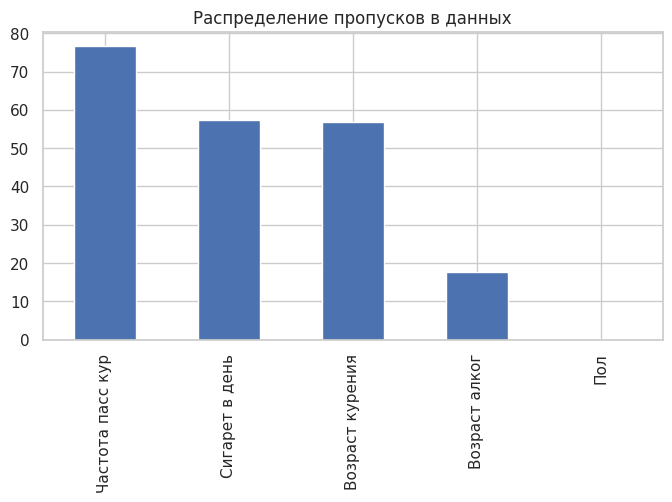

In [ ]:
cols_with_null.plot(
    kind='',
    figsize=(8, 4),
    title=''
);

#### Тепловая карта пропусков

Для создания тепловой карты: метод **isnull()**.
Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_palete() из библиотеки seaborn.

In [ ]:
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(15, 10))
cols = cols_with_null.index
ax = sns.heatmap(
    heart[cols].isnull(),
    cmap=sns.color_palette(colors),
)

#### **Работа с пропусками**

##### **1. Отбрасывание записей и признаков**

**Правило:** удаляется столбец, если число пропусков в нем более 30%. В остальных случаях удаляются записи.

Метод **dropna()**

***Основные параметры:***

* **axis** — ось, по которой производится удаление (по умолчанию 0 — строки).
* **how** — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски).
* **thresh** —  порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим в thresh значение 2, то мы удалим строки, где число пропусков больше чем n-2, где n — число признаков (если axis=0).


Предварительно создадим копию исходной таблицы — drop_heart, чтобы не повредить её. Зададимся порогом в 70%: будем оставлять только те столбцы, в которых 70 и более процентов записей не являются пустыми. После этого удалим записи, в которых содержится хотя бы один пропуск.

In [ ]:
#создаем копию исходной таблицы
drop_heart = heart.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_heart.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_heart = drop_heart.dropna(thresh=thresh, axis=1)#удаляем записи, в которых есть хотя бы 1 пропуск
drop_heart = drop_heart.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_heart.isnull().mean()

In [ ]:
print(drop_heart.shape)

##### **2. Заполнение недостающих значений константами**

Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков.

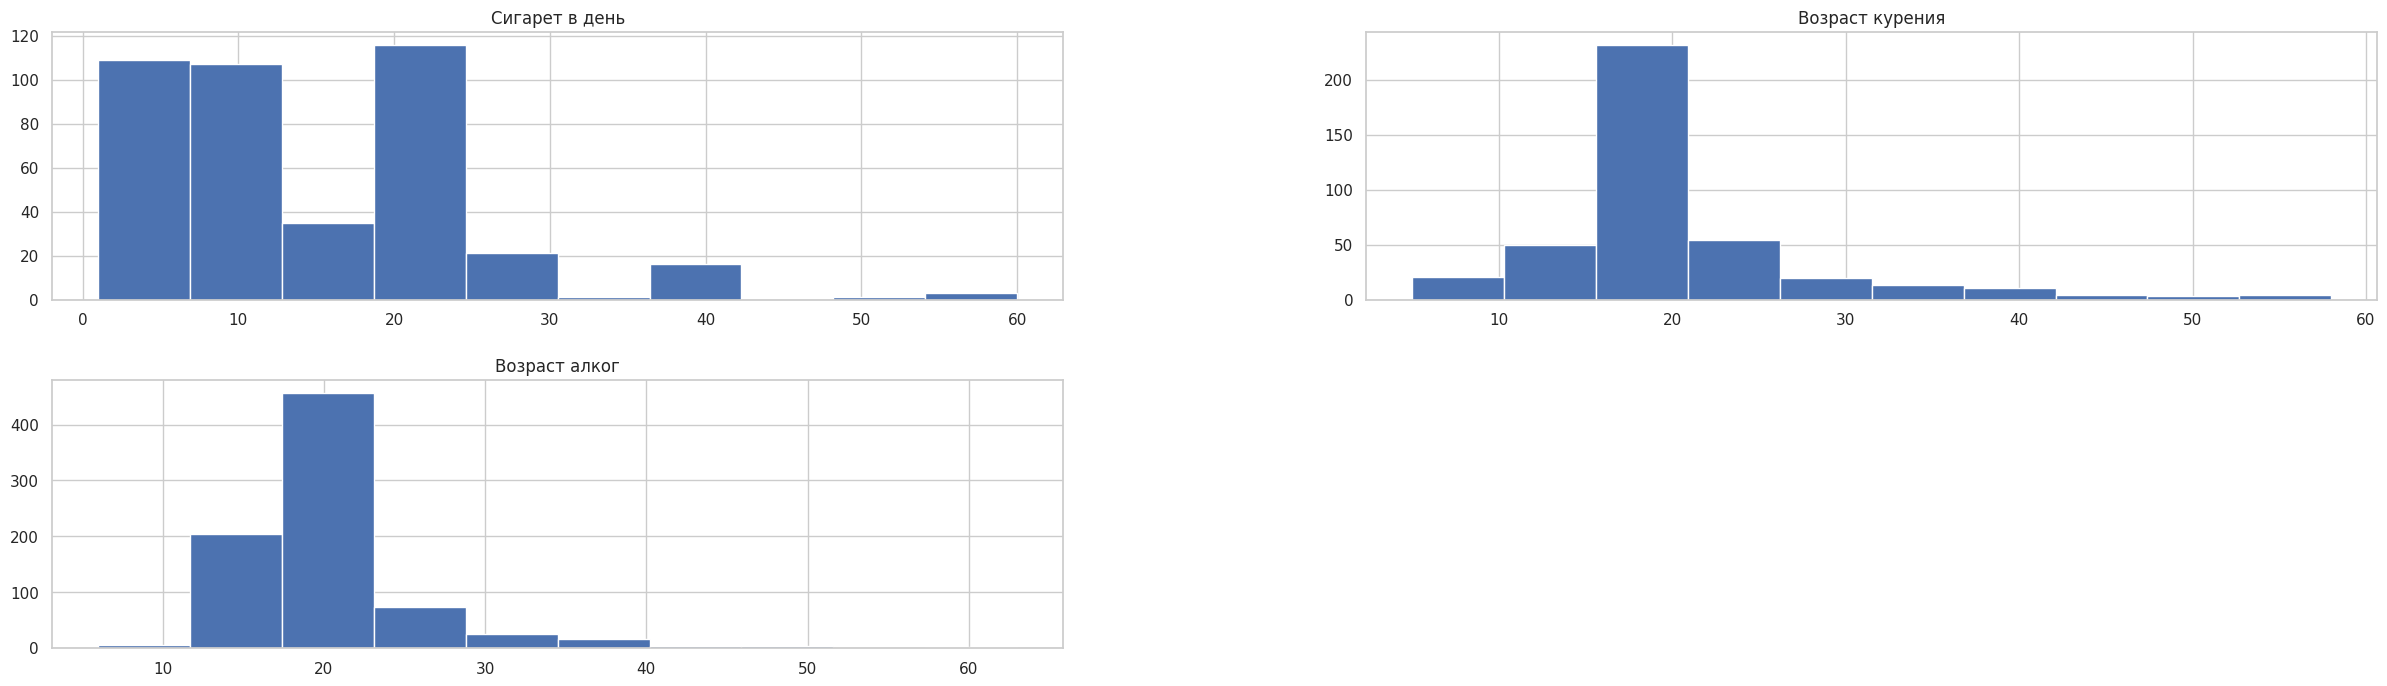

In [ ]:
cols = cols_with_null.index
heart[cols].hist(figsize=(30, 8));

**Рекомендации**

 * Для **распределений, похожих на логнормальное**, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов. Среднее очень чувствительно к выбросам. Предпочтительнее использовать медианное значение для таких признаков.

* Если ***признак числовой и дискретный***, то его заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Такой признак заполняют либо модой, либо округляют до целого числа (или нужного количества знаков после запятой) среднее/медиану.
* **Категориальные признаки** заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'.
* Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных это признак **Пассивное курение**.

У пациентов с нулевым значением в переменной **Пассивное курение** должны быть пропущены значения в столбцах **Частота пасс кур**. Проверим это.

In [ ]:
# Проверяем условие, что если 'Пассивное курение' равно 0, то 'Частота пасс кур' должна быть NaN
condition = (heart['Пассивное курение'] == 0) & (heart['Частота пасс кур'].notna())

# Подсчитываем количество строк, где условие не выполняется
count_invalid_rows = condition.sum()

# Если условие выполняется для хотя бы одной строки, выводим соответствующее сообщение и индексы строк
if count_invalid_rows > 0:
    print('Есть строки, где "Пассивное курение" равно 0, но "Частота пасс кур" не является NaN.')
    print('Индексы этих строк:')
    print(heart.index[condition].tolist())
    print(f'Количество таких строк: {count_invalid_rows}')
else:
    print('Все строки корректны: если "Пассивное курение" равно 0, то "Частота пасс кур" равна NaN.')

Одна ошибка. У пациента с индексом 392 условие не выполняется. Изучим данного пациента.

In [ ]:
print(heart.loc[392])

* Заменим значение признака ‘Пассивное курение’ для пациента с индексом 392 на 1.

In [ ]:
heart.loc[392, 'Пассивное курение'] = 1

Теперь всё правильно и мы можем заполнить эти пропуски нулями.

* Заполним пропуски в признаке **Частота пасс кур** нулями. Но так как признак является категорийным, поставим 0 как строку, заключив в кавычки. Иначе далее при кодировании признака эти нули снова будут рассматриваться как пропущенные значения.

Заполнение значений осуществляется с помощью метода **fillna()**.

Главный параметр метода — **value** (значение, заполняются данные в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы.

In [ ]:
heart.fillna({'Частота пасс кур':'0'}, inplace=True)

Проверим отсутствуют ли значения в столбцах **Возраст курения** и **Сигарет в день** у людей, которые никогда не курили

In [ ]:
# Находим строки, где 'Возраст курения' отсутствует
missing_smoking_age = heart['Возраст курения'].isna()

# Находим строки, где 'Сигарет в день' также отсутствует
missing_cigarettes_per_day = heart['Сигарет в день'].isna()

# Проверяем, есть ли строки, где 'Возраст курения' отсутствует и 'Сигарет в день' также отсутствует
if (missing_smoking_age & missing_cigarettes_per_day).any():
    print('Да, это правда!')

Да, это правда!


Мы можем заполнить эти пропуски, используя максимальное значение возраста (например, 90, что будет означать, что пациент начал курить только в 90 лет...точнее никогда не начнёт) для **Возраст курения** и ноль для **Сигарет в день**.

In [ ]:
heart.fillna({'':}, inplace=True)
heart.fillna({'':}, inplace=True)

Аналогично для переменной **Возраст алког**.

In [ ]:
heart.fillna({'':}, inplace=True)

* Вычислим сумму  пропущенных значений в каждом столбце.

    *   Метод **isna()** возвращает таблицу, состоящую из **True/False** для каждого
элемента, в зависимости от того находится ли там пропущенное значение (**NaN**).

    *   Метод **sum()** суммирует элементы в столбцах таблицы принимая **True** за **1**, а **False** за **0**.

In [ ]:
heart.isna().sum()

##### **Пол**

У 2-х пациентов неизвестен пол

In [ ]:
heart['Пол'].value_counts(dropna=False)

,count
Пол,
Ж,666
М,288
NaN,2


* Выберем только строчки с данными о пациентах, у которого не указан пол

In [ ]:
heart[heart['Пол'].isna()]

In [ ]:
# Кодировка пола как 0.5:
# heart['Пол'] = heart['Пол'].map({'Ж': 0, 'М': 1})
# heart['Пол'].fillna(0.5, inplace=True)

* Так как пустых значений в признаке **Пол** меньше 1%, удалим из датасета строчки, в которой не указан пол пациента

In [ ]:
heart.dropna(subset=['Пол'], axis=0, inplace=True)

* Проверим остались ли у нас пропущенные значения в данных

Есть ещё способы заполнения пропусков:

##### **3. Заполнение недостающих значений константами с добавлением индикатора**

Добавляются к данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определённом месте в таблице был пропуск. Это место в столбце-индикаторе будем помечать как True.



```
#создаем копию исходной таблицы
indicator_heart = heart.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_heart[col + '_was_null'] = indicator_heart[col].isnull()
#создаем словарь 'имя столбца' : число (признак), на которое (который) надо заменить пропуски
values = {
    'Сигарет в день': indicator_heart['Сигарет в день'].median(),
    'Возраст курения': indicator_heart['Возраст курения'].median(),
    'Возраст алк': indicator_heart['Возраст алког'].mode()[0],
    
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_heart = indicator_heart.fillna(values)
#выводим результирующую долю пропусков
indicator_heart.isnull().mean()
```




**Минус:** когда мы добавляем признаки-индикаторы, мы повышаем размерность наших данных.

##### **4. Комбинирование методов**

Можно комбинировать методы. Например:

* удалить столбцы, в которых более 30% пропусков;
* удалить записи, в которых более двух пропусков одновременно;
* заполнить оставшиеся ячейки константами.

Посмотрим на реализацию такого подхода в коде:


```
#создаём копию исходной таблицы
combine_heart = heart.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_heart.shape[0] #число строк в таблице
thresh = n*0.7
combine_heart = combine_heart.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_heart.shape[1] #число признаков после удаления столбцов
combine_heart = combine_heart.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца' : число (признак), на которое (который) надо заменить пропуски
values = {
    'Сигарет в день': indicator_heart['Сигарет в день'].median(),
    'Возраст курения': indicator_heart['Возраст курения'].median(),
    'Возраст алк': indicator_heart['Возраст алког'].mode()[0],
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_heart = combine_heart.fillna(values)
#выводим результирующую долю пропусков
display(combine_heart.isnull().mean())
```



### ДУБЛИКАТЫ

**Дубликатами** называются записи, для которых значения (всех или большинства) признаков совпадают.

За дубликаты можно посчитать записи, у которых совпадают либо все признаки, либо только часть признаков.

Если в таблице есть столбец с уникальным идентификатором (ID), можно попробовать поискать дубликаты по нему: одинаковые записи могут иметь одинаковый ID:

код

**heart['ID'].nunique() == heart.shape[0]**



**МЕТОД** **duplicated()**

Возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает True, для остальных — False.

Параметр **subset** — список признаков, по которым производится поиск дубликатов.

По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

In [ ]:
dupl_columns = list(heart.columns)
mask = heart.duplicated(subset=dupl_columns)
heart_duplicates = heart[mask]
print(f'Число найденных дубликатов: {heart_duplicates.shape[0]}')

* Если дубликаты есть, необходимо от них избавиться

Метод **drop_duplicates()** - удаляет повторяющиеся записи из таблицы.

In [ ]:
heart = heart.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {heart.shape[0]}')

### ВЫБРОСЫ

Выброс — наблюдение, которое существенно отличается от общего распределения и от других данных.

Выбросами могут быть как действительно реальные отклонения в данных, так и ошибкой.

Поиск потенциальных выбросов с помощью визуализации. Для числового признака можно построить гистограмму или коробчатую диаграмму, чтобы найти выбросы.

* Установите стиль seaborn или matplotlib (например, sns.set_style('whitegrid') или другой на ваш вкус). Это влияет на фон и сетку.
* Задайте палитру/цвет по умолчанию, если хотите изменить цвет гистограммы или boxplot(не обязательно).
* Создайте объект фигуры и массив осей с помощью plt.subplots. Параметры должны быть: nrows=1, ncols=2, figsize=(20, 4). Это создаст одну строку с двумя колонками и задаст размеры фигуры (широкая и невысокая).
* Сохраняйте возвращённые объекты в переменные (обычно fig, axes). Обратите внимание, что axes[0] — это первая ось (левая), axes[1] — вторая (правая).
* С помощью sns.histplot постройте гистограмму распределения переменной 'Сигарет в день', передав параметры data=heart, x='Сигарет в день' и ax=axes[0].
* После построения задайте заголовок для этой оси методом set_title('Распределение Сигарет в день').
* Подпишите ось X и Y с помощью set_xlabel и set_ylabel, если нужно явное обозначение.
* С помощью sns.boxplot постройте boxplot для той же переменной, передав data=heart, x='Сигарет в день' и ax=axes[1].
* Задайте заголовок для второй оси методом set_title('Сигарет в день Boxplot').
* Отрегулируйте ориентацию или подписи осей.

##### **1. Метод межквартильного размаха (метод Тьюки)**

In [ ]:
from IPython.display import Image

**Алгоритм:**

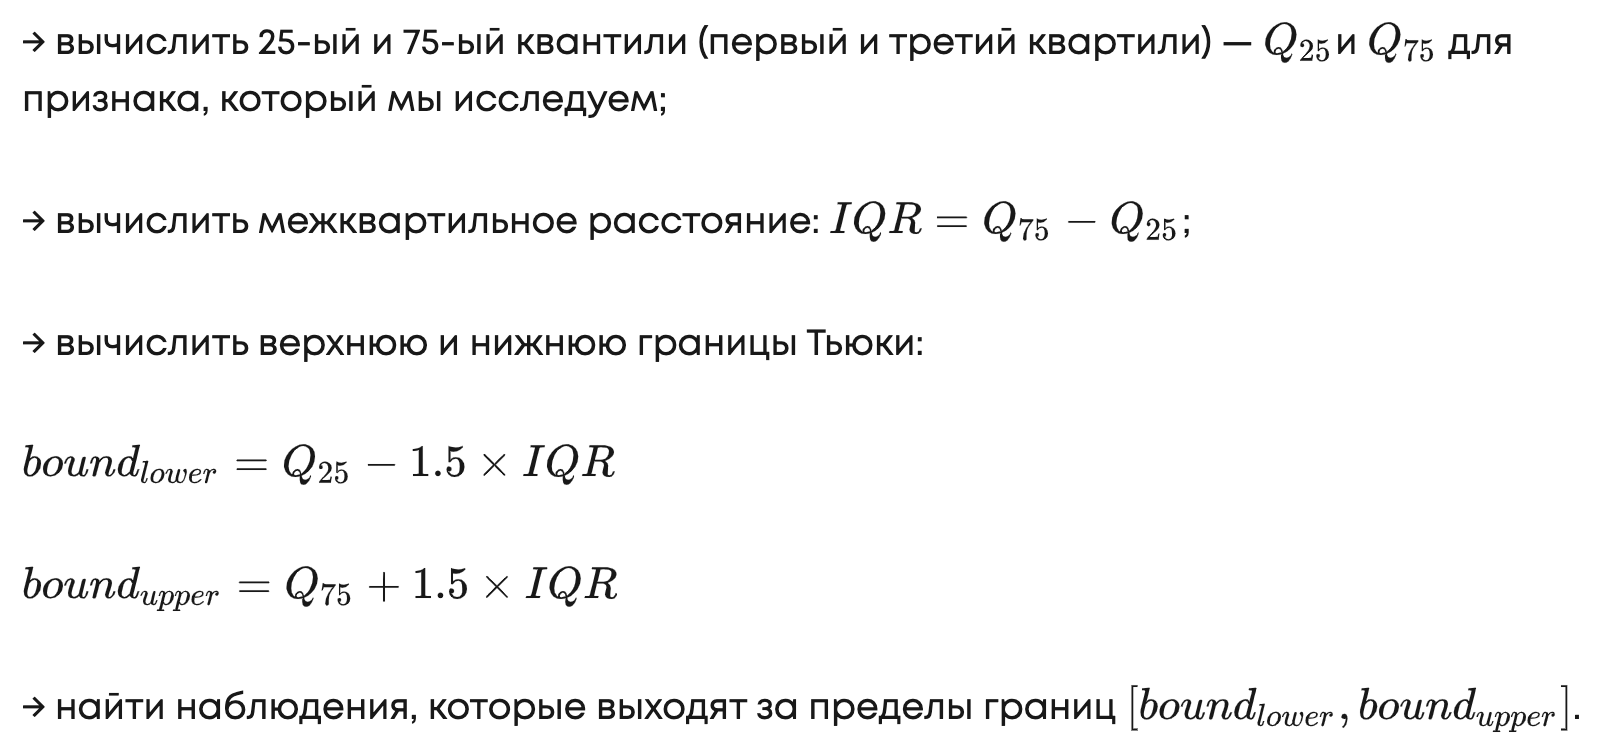

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/Image1.png', width=700, height=300)

В соответствии с этим алгоритмом напишем функцию **outliers_iqr()**, которая принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.

Квантили вычисляются с помощью метода **quantile()**. Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

In [ ]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

Применим эту функцию к таблице **heart** и признаку **Сигарет в день**, а также выведем размерности результатов:



In [ ]:
outliers, cleaned = outliers_iqr(heart, 'Сигарет в день')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 39
Результирующее число записей: 914


Согласно классическому методу Тьюки, под выбросы попали 39 записей в таблице. Построим гистограмму и коробчатую диаграмму на новых данных cleaned_heart:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='Сигарет в день', ax=axes[0]);
histplot.set_title('Сигарет в день Distribution');
boxplot = sns.boxplot(data=cleaned, x='Сигарет в день', ax=axes[1]);
boxplot.set_title('Сигарет в день Boxplot');

Модифицируем функцию **outliers_iqr(data, feature).** Добавим в неё параметры **left** и **right**, которые задают число **IQR** влево и вправо от границ ящика. Функция, как и раньше, будет возвращать потенциальные выбросы и очищенный DataFrame.

Ослабим границы метода Тьюки справа и усилим их влево. Применим модифицированную функцию outliers_iqr_mod() к признаку **Сигарет в день** данным с параметрами left=1 и right=2. Результаты работы поместим в переменные outliers и cleaned.

In [ ]:
outliers, cleaned = outliers_iqr_mod(heart, 'Сигарет в день', left=1, right=2)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Если мы построим гистограмму и коробчатую диаграмму на полученных данных, то увидим вот такую картинку:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='Сигарет в день', ax=axes[0]);
histplot.set_title('Сигарет в день Distribution');
boxplot = sns.boxplot(data=cleaned, x='Сигарет в день', ax=axes[1]);
boxplot.set_title('Сигарет в день Boxplot');

##### **2. Метод z-отклонений (метод сигм)**

Правило трёх сигм: если распределение данных является нормальным, то 99,73% лежат в интервале от (μ-3σ, μ+3σ) , где μ(мю) — математическое ожидание (для выборки это среднее значение), а σ(сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

Схематично правило трёх сигм для нормального распределения представлено на рисунке ниже:

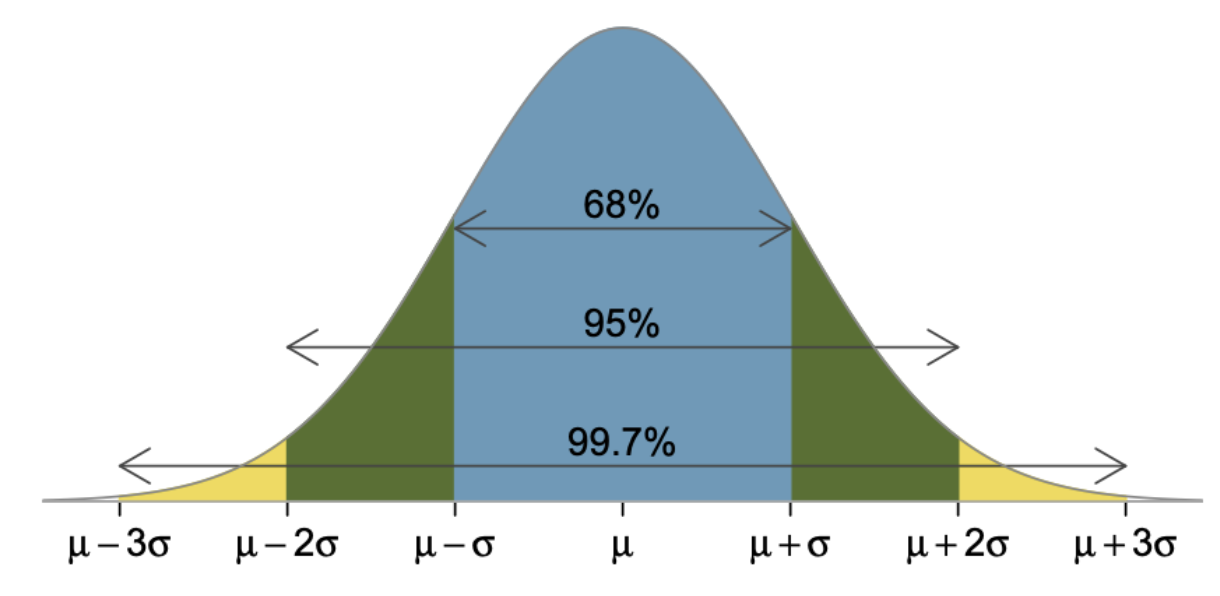

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/Image2.png', width=600, height=300)

Если данные не распределены нормально: логарифмирование. Оно может привести исходное распределение к подобию нормального. Причем основание логарифма может быть любым.

##### **Логарифмирование**

Построим две гистограммы признака **Сигарет в день**: первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#гистограмма исходного признака
histplot = sns.histplot(heart['Сигарет в день'], bins=30, ax=axes[0])
histplot.set_title('Сигарет в день Распределение');

#гистограмма в логарифмическом масштабе
log_sig= np.log(heart['Сигарет в день'] + 1)
histplot = sns.histplot(log_sig , bins=30, ax=axes[1])
histplot.set_title('Сигарет в день Лограспределение');

Левое распределение напоминает логнормальное распределение с наличием потенциальных выбросов-«пеньков», далеко отстоящих от основной массы наблюдений.


**Алгоритм метода z-отклонений (метод сигм):**

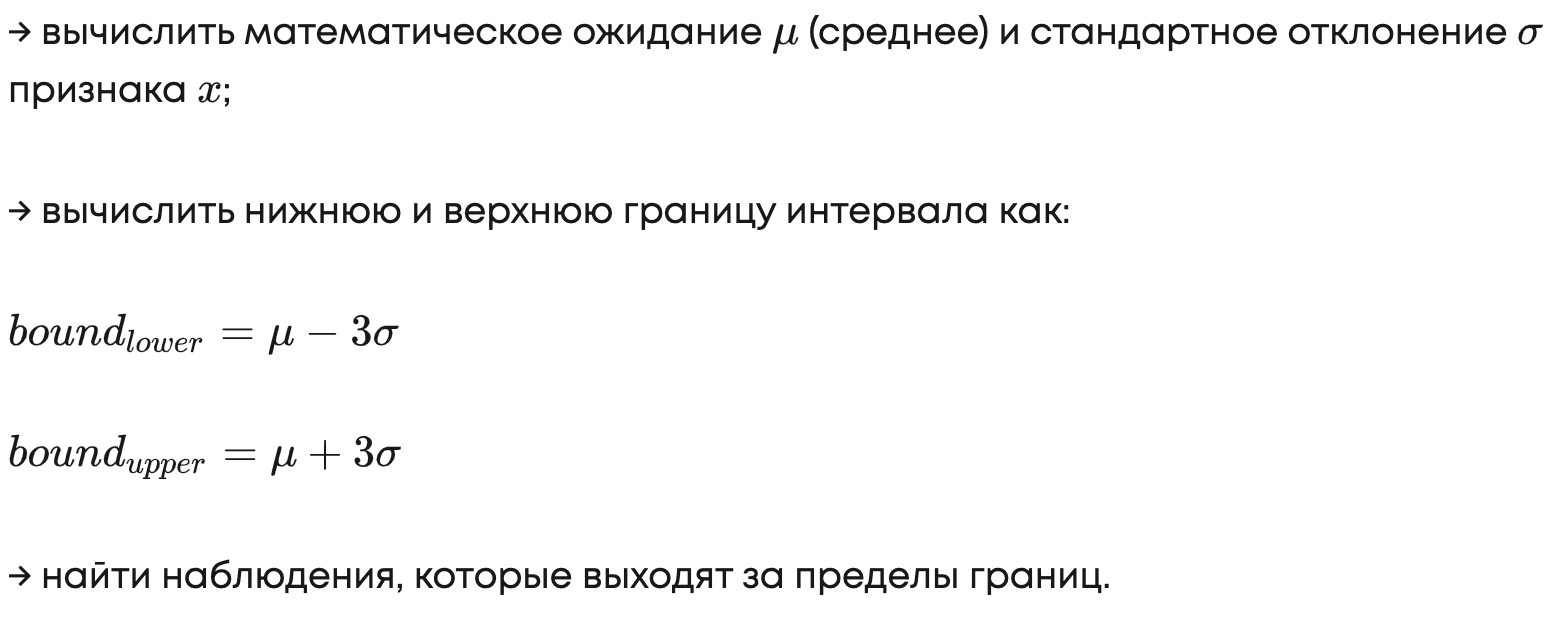

In [ ]:
Image('/content/drive/MyDrive/Colab Notebooks/Python 2024-2025/data/Image3.png', width=600, height=250)

Напишем функцию outliers_z_score(), которая реализует этот алгоритм.

На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе оставляем его в исходном виде.

Функция будет возвращать выбросы и очищенные от них данные:

In [ ]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

Применим эту функцию к таблице **heart** и признаку **Сигарет в день**, а также выведем размерности результатов:

In [ ]:
outliers, cleaned = outliers_z_score(heart, 'Сигарет в день', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Если логарифм распределения не идеально нормален и в нём присутствует некоторая асимметрия, стоит дать некоторое «послабление» на границы интервалов. Построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала μ+3σ. Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_sig = np.log(heart['Сигарет в день'] + 1)
histplot = sns.histplot(log_sig, bins=30, ax=ax)
histplot.axvline(log_sig.mean(), color='k', lw=2)
histplot.axvline(log_sig.mean()+ 3 * log_sig.std(), color='k', ls='--', lw=2)
histplot.axvline(log_sig.mean()- 3 * log_sig.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Сигарет в день распределение');

Расширим правило трёх сигм, чтобы иметь возможность учитывать особенности данных. Добавим в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3.

In [ ]:
def outliers_z_score_mod(data, feature, left, right, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_z_score_mod(heart, 'Сигарет в день',left=1, right=2, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

##### **3. Метод ручного поиска и здравого смысла**

Метод, основанный на логике, методе пристального взгляда и небольшом количестве статистики. Он предполагает поиск невозможных и нелогичных значений в данных.

* Рассчитайте статистические показатели для переменной **"Сигарет в день"** с помощью функции **.describe()**

In [ ]:
# Подсчет количества строк, где "Сигарет в день" больше 40
count = heart[heart['Сигарет в день'] > 40].shape[0]

# Вывод результата
print(f'Количество строк с "Сигарет в день" больше 40: {count}')

In [ ]:
# Фильтрация значений, где "Сигарет в день" больше 40
filtered_values = heart.loc[heart['Сигарет в день'] > 40, 'Сигарет в день']

# Вывод значений на экран
print(filtered_values)

In [ ]:
# Удаление строк, где "Сигарет в день" больше 40
heart = heart[heart['Сигарет в день'] <= 40]

In [ ]:
heart.shape

In [ ]:
heart['Сигарет в день'].describe()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
histplot = sns.histplot(data=heart, x='Сигарет в день', ax=axes[0]);
histplot.set_title('Распределение Сигарет в день');
boxplot = sns.boxplot(data=heart, x='Сигарет в день', ax=axes[1]);
boxplot.set_title('Сигарет в день Boxplot');

### ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

Категориальные переменные требуют соответствующей **кодировки** для обработки в моделях машинного обучения.

* Закодируем признак **Пол**

In [ ]:
heart['Пол'] = heart['Пол'].map({'М': 0, 'Ж': 1})

In [ ]:
heart.head()

* Исследуем признаки **Образование** и **Частота пасс кур**

In [ ]:
for col in ['Образование', 'Частота пасс кур']:
    print(heart[col].value_counts(dropna=False))
    print()

Признаки **Образование** и **Частота пасс кур** являются ординальными.

**Ординарные признаки** (также известные как порядковые или ранговые) - это характеристики, которые можно упорядочить по степени или уровню.

* Заменим все уникальные значения переменной **Частота пасс кур** на числа

In [ ]:
heart['Частота пасс кур'] = heart['Частота пасс кур'].map(
    {'0': ,
     '1-2 раза в неделю': ,
     '3-6 раз в неделю': ,
     'не менее 1 раза в день': ,
     '2-3 раза в день': ,
     '4 и более раз в день': })

* Изменим тип переменной **Частота пасс кур** на целочисленный

In [ ]:
heart['Частота пасс кур'] = heart['Частота пасс кур'].astype(int)

* Закодируем признак **Образование**

In [ ]:
heart['Образование'] = heart['Образование'].str[:1].astype(int)

**.str[:1]** получает первый символ каждой строки, а **.astype(int)** преобразует полученные символы в целые числа (изначально они были строками).

* Посмотрим результат

In [ ]:
for col in ['Образование', 'Частота пасс кур']:
    print(heart[col].value_counts(dropna=False))
    print()

### ОБРАБОТКА ЧИСЛОВЫХ ПРИЗНАКОВ

Рассмотрим переменные **Время пробуждения** и **Время засыпания**

* Закодируем время пробуждения, как час от полуночи, а время засыпания, как час от полудня

In [ ]:
heart['Время пробуждения'].head()

In [ ]:
heart['Время пробуждения'] = heart['Время пробуждения'].str[:2].astype(int)
heart['Время засыпания'] = (heart['Время засыпания'].str[:2].astype(int) + 12) % 24

В первой строке кода происходит преобразование первых двух символов каждого значения в столбце **Время пробуждения** в целые числа.

Вторая строка кода преобразует первые два символа каждого значения в столбце **Время засыпания** в целые числа, добавляет 12 к каждому значению, а затем берет остаток от деления на 24, т.е. преобразует значения в часы после полуночи.

In [ ]:
heart['Время пробуждения'].head()

* Добавим в датасет новый признак - **Продолжительность сна**

In [ ]:
heart['Продолжительность сна'] = heart['Время пробуждения'] - heart['Время засыпания'] + 12

* Посмотрим что у нас получилось

In [ ]:
heart.head(5)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 954
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Бронхиальная астма                      949 non-null    int64  
 1   ЛПНП                                    949 non-null    float64
 2   Возраст алког                           949 non-null    float64
 3   Работа                                  949 non-null    int64  
 4   Статус Курения                          949 non-null    object 
 5   Пассивное курение                       949 non-null    int64  
 6   Переломы                                949 non-null    int64  
 7   Время пробуждения                       949 non-null    int64  
 8   ЛПВП                                    949 non-null    float64
 9   Выход на пенсию                         949 non-null    int64  
 10  Холестерин                              949 non-null    float64
 11

Больше нет пропущенных значений. Осталось 6 категориальных признаков. Но прежде чем их кодировать, посмотрим корреляционные зависимости между всеми числовыми признаками.

In [ ]:
heart.corr(numeric_only=True).round(2)

In [ ]:
plt.figure(figsize = (20,18))
# heart.corr(numeric_only=True): вычисляет корреляционную матрицу для числовых столбцов DataFrame heart
# annot=True: отображает числовые значения корреляций на тепловой карте
# fmt=".2f": определяет формат числовых значений, отображаемых на тепловой карте (2 знака после запятой)
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f")

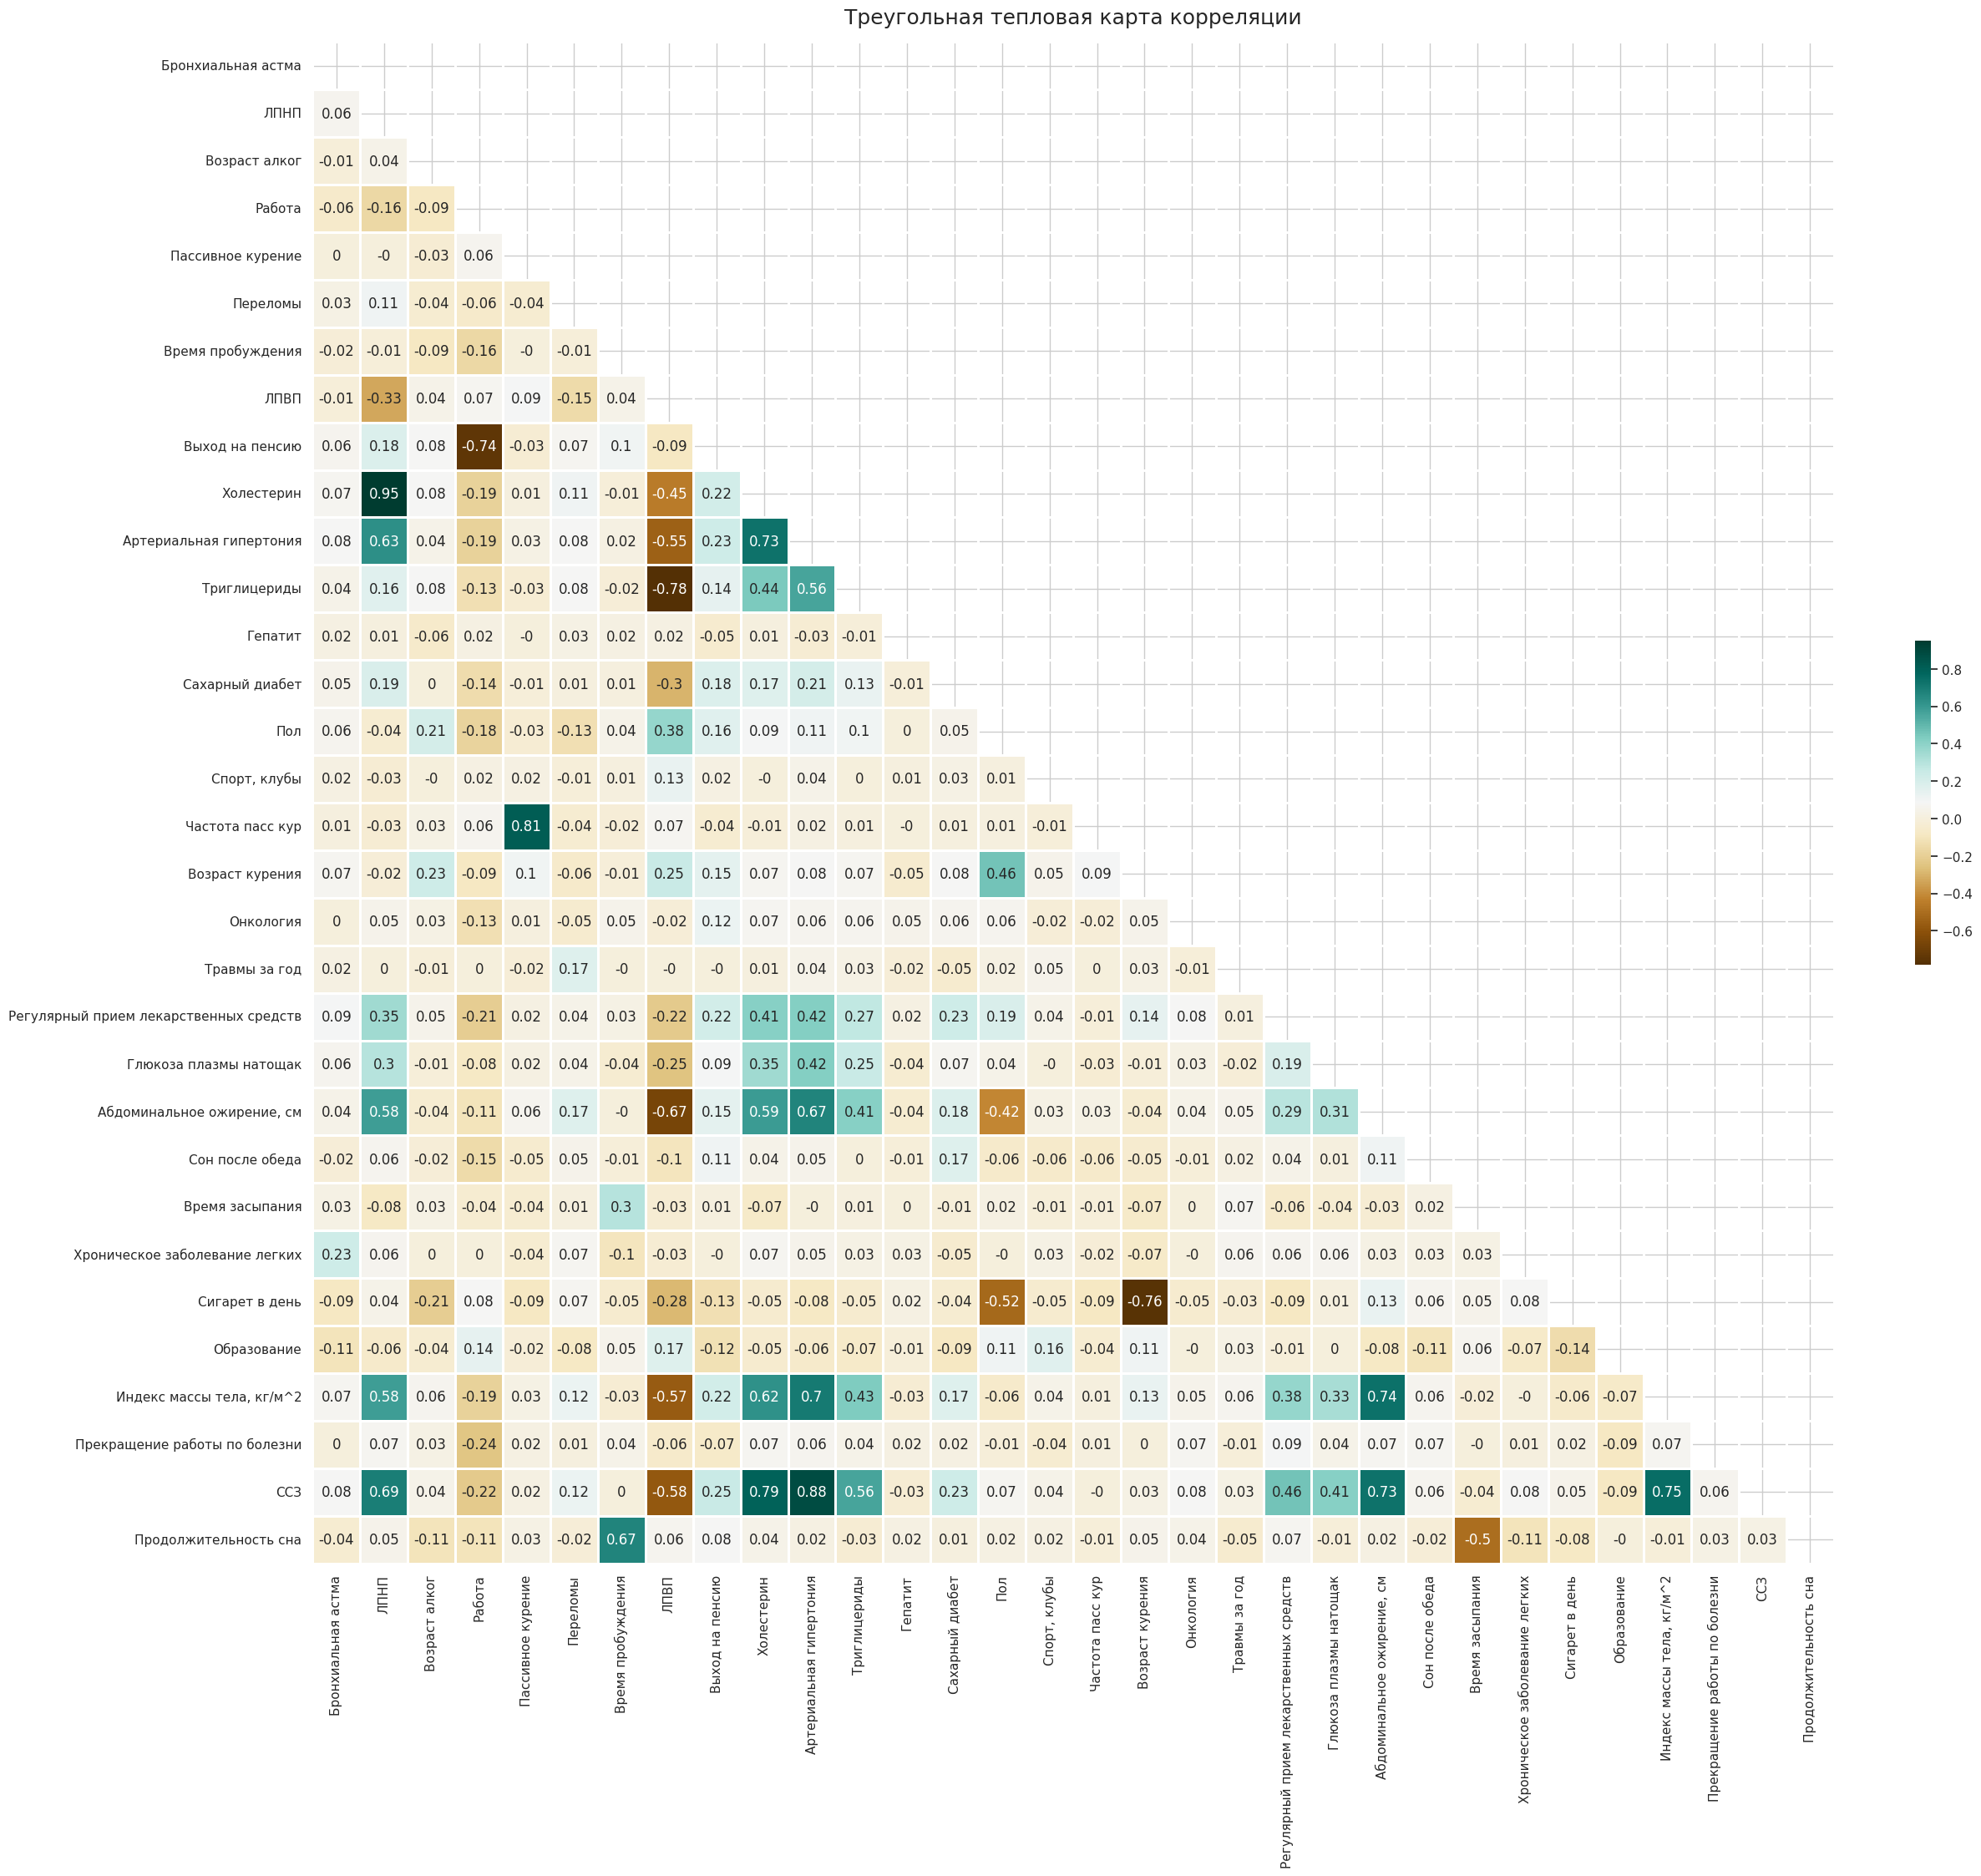

In [ ]:
plt.rcParams["figure.figsize"] = (25, 25)
sns.set_style("whitegrid")

# Воспользуемся функциями np.triu, чтобы изолировать верхний треугольник (np.tril нижний)
# функция np.ones_like() изменит все изолированные значения на 1.
mask = np.triu(np.ones_like(heart.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    heart.corr(numeric_only=True).round(2),
    annot=True, # annot=True: отображает числовые значения корреляций на тепловой карте
    square=True, # ячейки будут квадратными
    cmap="BrBG", # указывает цветовую палитру «коричневый-синий-зелёный»
    cbar_kws={"fraction": 0.01}, # размер цветовой шкалы (colorbar) уменьшается на 0,01.
    linewidth=1, # указывает, что между каждой ячейкой (бином) будет добавлена тонкая белая линия

    mask=mask,
)

heatmap.set_title(
    "Треугольная тепловая карта корреляции", fontdict={"fontsize": 18}, pad=16
);

In [ ]:
corr = heart.corr(numeric_only=True).round(4)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

Признаки **Пассивное курение** и **Частота пасс кур**

**Холестерин** и **ЛПНП**

сильно коррелируют. Удалим один из них


In [ ]:
heart = heart.drop(columns=["Пассивное курение", "ЛПНП"], axis=1)

In [ ]:
heart.shape

In [ ]:
heart.columns

* Сохраним результат анализа на данный момент в новый датасет

##### **Промежуточое сохранение без кодировки 6 категорийных признаков**

In [ ]:
heart.to_csv('.../Данные/heart1.csv', index=False)

Осталось 6 категориальных признаков: **Семья**, **Национальность**, **Религия**, **Профессия**, **Статус Курения** и **Алкоголь**.

Для их кодирования можно использовать:

1) класс **OneHotEncoder** из библиотеки **sklearn.preprocessing**

2) **кодирование по популярности**  с  добавлением в закодированные значения небольшого уровня шума, чтобы различать категории с одинаковой популярностью


* Рассмотрим подробнее какие уникальные значения имеют 6 категориальных переменных, которые нам необходимо закодировать числовыми значениями

In [ ]:
for col in ['Семья', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']:
    print(heart[col].value_counts(dropna=False))
    print()

* Посчитаем сколько уникальных значений имеет категориальные признаки

In [ ]:
columns_to_change = ['Семья', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), heart[column].nunique())

##### 1. Кодирование категориальных переменных **OneHot-методом**




In [ ]:
# Инициализация кодировщика
one_hot_encoder = OneHotEncoder()

In [ ]:
# Обучаем энкодер, применяем преобразование к выборке. Результат переводим в массив
heart_onehot = one_hot_encoder.fit_transform(heart[columns_to_change]).toarray()

In [ ]:
# Сохраним полученные названия новых колонок в переменную colums
columns = one_hot_encoder.get_feature_names_out(columns_to_change)

In [ ]:
# Преобразуем массив в формат DataFrame
heart_onehot_df = pd.DataFrame(heart_onehot, columns=columns)

In [ ]:
# Переустановим индексацию в таблицах
# eset_index() — изменяет индексы с рандомных на последовательные от 0 до n
# drop(['index'], axis = 1) — удаляет образовавшийся столбец 'index'
heart = heart.reset_index().drop(['index'], axis = 1)

In [ ]:
# Объединим таблицы
heart = pd.concat([heart, heart_onehot_df], axis=1)

In [ ]:
# Удалим старые категориальные признаки
heart = heart.drop(columns=columns_to_change)

In [ ]:
heart.info()

In [ ]:
heart.columns

In [ ]:
heart.head().T

Такого же результата можно было добиться с помощью следующего кода:

In [ ]:
#def encode_data(heart, columns_to_change):
#  dummies = pd.get_dummies(heart[[columns_to_change]], dtype='int')
#  res = pd.concat([heart, dummies], axis=1)
#  res = res.drop([columns_to_change], axis=1)
#  return (res)
#for feature in columns_to_change:
# heart = encode_data(heart, feature)

* Построим матрицу корреляций

In [ ]:
heart.corr(numeric_only=True)

* Нарисуем тепловую карту матрицы корреляций

In [ ]:
plt.figure(figsize = (45,38))
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

* Найдём все признаки, корреляция которых выше 0,8

In [ ]:
corr = heart.corr(numeric_only=True)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

Удалим одну из коррелирующих переменных в каждой паре.

In [ ]:
heart.drop(columns=['',''], axis=1, inplace=True)

* Сохраним результат в новый набор данных

In [ ]:
heart.to_csv('.../Данные/heart2.csv', index=False)

##### 2. Кодирования категориальных признаков - **по популярности**

* Вернёмся к набору данных до кодирования  6 признаков

In [ ]:
heart = pd.read_csv('.../Данные/heart1.csv')
heart.head (3)

* Закодируем признаки по популярности с добавлением в закодированные значения небольшого уровня шума, чтобы различать категории с одинаковой популярностью

In [ ]:
np.random.seed(42)
cats = ['Семья', 'Национальность', 'Религия', 'Профессия', 'Статус Курения', 'Алкоголь']
for cat in cats:
    heart[cat] = heart[cat].map(heart[cat].value_counts()) + 0.1 * np.random.random(len(heart))

* Посмотрим результат данной кодировки

In [ ]:
heart[cats].head()

In [ ]:
heart.info()

In [ ]:
heart.corr(numeric_only=True).round(2)

In [ ]:
plt.figure(figsize = (20,18))
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f");

In [ ]:
corr = heart.corr(numeric_only=True)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

* Удалим одну из сильно коррелирующих переменных

In [ ]:
heart.drop('Статус Курения', axis=1, inplace=True)

* Сохраним результат в новый набор данных

In [ ]:
heart.to_csv('.../Данные/heart3.csv', index=False)

##### 3. OnHot метод + бинарное кодирование

In [ ]:
heart=pd.read_csv('/content/drive/MyDrive/ПК-ППК/Данные/heart1.csv')
heart.head()

In [ ]:
columns_to_change1 = ['Семья', 'Религия', 'Статус Курения', 'Алкоголь']
for column in columns_to_change1:
 print('Число уникальных значений признака {}: '.format(column), heart[column].nunique())

* Проведём кодирование категориальных переменных **OneHot-методом**




In [ ]:
one_hot_encoder = OneHotEncoder()
heart_onehot = one_hot_encoder.fit_transform(heart[columns_to_change1]).toarray()
columns = one_hot_encoder.get_feature_names_out(columns_to_change1)
heart_onehot_df = pd.DataFrame(heart_onehot, columns=columns)
heart = heart.reset_index().drop(['index'], axis = 1)
heart = pd.concat([heart, heart_onehot_df], axis=1)
heart = heart.drop(columns=columns_to_change1)

In [ ]:
heart.info()

In [ ]:
pip install category_encoders

In [ ]:
heart.head()

* Проведём бинарное кодирование переменных **Национальность** и **Профессия**

In [ ]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols =['Национальность'])
newdata = encoder.fit_transform(heart['Национальность'])
heart = pd.concat([heart, newdata], axis = 1)
heart = heart.drop(['Национальность'], axis = 1)
heart.head()

In [ ]:
encoder = BinaryEncoder(cols =['Профессия'])
newdata = encoder.fit_transform(heart['Профессия'])
heart = pd.concat([heart, newdata], axis = 1)
heart = heart.drop(['Профессия'], axis = 1)
heart.head(10)

In [ ]:
heart.info()

In [ ]:
for col in heart.columns:
    print(heart[col].value_counts(dropna=False))
    print()

In [ ]:
heart.corr(numeric_only=True).round(2)

In [ ]:
sns.heatmap(heart.corr(numeric_only=True));

In [ ]:
corr = heart.corr(numeric_only=True)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

In [ ]:
heart.drop(columns=['Статус Курения_Никогда не курил(а)', 'Алкоголь_никогда не употреблял'], axis=1, inplace=True)

In [ ]:
heart.to_csv('/content/drive/MyDrive/ПК-ППК/Данные/heart4.csv', index=False)

Другие способы кодирования категориальных признаков: [ссылка](https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/)

### конец